In [158]:
# import necessary libraries
import pandas as pd

In [159]:
# Access Diamond Dataset
df = pd.read_csv("data/diamond_data.csv")
X = df.iloc[:,0:5]
y_true = df.iloc[:,6]

df.head()

,carat,depth,table,x,y,z,Cluster
0,4.392339,70.000000,68.724539,6.646538,10.000000,2.166707,2
1,5.000000,70.000000,56.352819,3.317482,3.000000,6.000000,2
2,4.161129,59.436452,64.940874,6.561249,3.000000,2.000000,0
3,0.200000,70.000000,55.936566,6.791424,5.590846,2.000000,1
4,0.200000,70.000000,51.063670,3.000000,6.838612,2.000000,2


In [160]:
# Visualize the data (First two features)
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=3000, centers=3, n_features=6, cluster_std=1.0, random_state=42)
X = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6'])

In [161]:
# Make blobs
import matplotlib.pyplot as plt

In [162]:
# perform PCA on the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

/var/folders/d0/khdknjlx32g8qbtptzxxr_hh0000gn/T/ipykernel_2441/95128758.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca['PC1'], data_pca['PC2'], cmap='viridis')


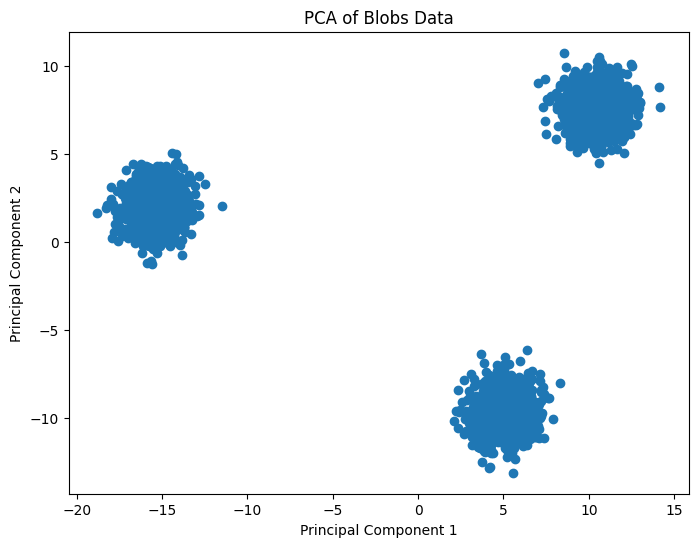

In [163]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca['PC1'], data_pca['PC2'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Blobs Data')
plt.show()

In [164]:
# Perform KMeans Clustering on the data
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=30)
model.fit(X)
labels = model.labels_
centers = pca.transform(model.cluster_centers_)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


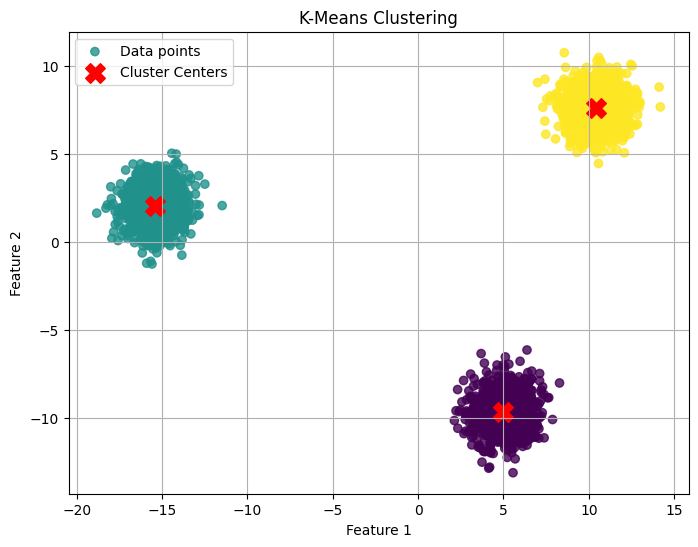

In [165]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca["PC1"], data_pca["PC2"], c=labels, cmap='viridis', alpha=0.8, label='Data points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [166]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, model.labels_, metric='euclidean'))

0.8318982976384981
